<a href="https://colab.research.google.com/github/Soedirman-Machine-Learning/dl-time-series-forecasting/blob/main/ARIMA_Univariat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install "statsmodels==0.11.1"
!pip install "scikit-learn==0.24"

     |████████████████████████████████| 8.7 MB 21.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 22.3 MB 1.5 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [16]:
! git clone https://github.com/Soedirman-Machine-Learning/dl-time-series-forecasting

Cloning into 'dl-time-series-forecasting'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 65 (delta 26), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (65/65), done.


In [2]:
import numpy as np
import pandas as pd
import numpy
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
from math import sqrt


In [3]:
def predict(coef, history):
	yhat = 0.0
	for i in range(1, len(coef)+1):
		yhat += coef[i-1] * history[-i]
	return yhat

def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return numpy.array(diff)

series = read_csv('https://raw.githubusercontent.com/Soedirman-Machine-Learning/dl-time-series-forecasting/main/dataset_univariat.csv', header=0)
series

,y
0,0.180295
1,0.177124
2,0.173618
3,0.171640
4,0.166972
...,...
2389,0.188976
2390,0.178992
2391,0.169742
2392,0.159023


In [5]:
X = series.values
size = len(X) - 479
train, test = X[0:size], X[size:]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,1))
	model_fit = model.fit()
	ar_coef, ma_coef = model_fit.arparams, model_fit.maparams
	resid = model_fit.resid
	diff = difference(history)
	yhat = history[-1] + predict(ar_coef, diff) + predict(ma_coef, resid)
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('>predicted=%.3f, expected=%.3f' % (yhat, obs))

>predicted=0.270, expected=0.270


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.260, expected=0.258
>predicted=0.246, expected=0.247
>predicted=0.236, expected=0.233


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.221, expected=0.229
>predicted=0.224, expected=0.213


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.200, expected=0.200
>predicted=0.188, expected=0.192
>predicted=0.183, expected=0.180
>predicted=0.170, expected=0.172
>predicted=0.165, expected=0.167
>predicted=0.161, expected=0.166
>predicted=0.164, expected=0.168
>predicted=0.170, expected=0.178
>predicted=0.187, expected=0.198
>predicted=0.216, expected=0.220
>predicted=0.239, expected=0.243
>predicted=0.264, expected=0.263
>predicted=0.282, expected=0.276


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.288, expected=0.291
>predicted=0.305, expected=0.300
>predicted=0.309, expected=0.299
>predicted=0.299, expected=0.304
>predicted=0.307, expected=0.302
>predicted=0.302, expected=0.299
>predicted=0.297, expected=0.291
>predicted=0.285, expected=0.288
>predicted=0.284, expected=0.281


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.275, expected=0.272
>predicted=0.264, expected=0.270
>predicted=0.268, expected=0.264
>predicted=0.259, expected=0.261


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.258, expected=0.261
>predicted=0.261, expected=0.259
>predicted=0.257, expected=0.260
>predicted=0.261, expected=0.261
>predicted=0.262, expected=0.261
>predicted=0.261, expected=0.261
>predicted=0.261, expected=0.260
>predicted=0.259, expected=0.259
>predicted=0.258, expected=0.251


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.244, expected=0.248
>predicted=0.244, expected=0.243


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.239, expected=0.234
>predicted=0.227, expected=0.225
>predicted=0.217, expected=0.216
>predicted=0.208, expected=0.211
>predicted=0.205, expected=0.204
>predicted=0.198, expected=0.201
>predicted=0.197, expected=0.197
>predicted=0.194, expected=0.200
>predicted=0.201, expected=0.203


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.206, expected=0.213
>predicted=0.222, expected=0.234
>predicted=0.253, expected=0.260
>predicted=0.283, expected=0.295


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.326, expected=0.333


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.368, expected=0.380
>predicted=0.422, expected=0.429
>predicted=0.474, expected=0.486
>predicted=0.538, expected=0.544


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.598, expected=0.596
>predicted=0.646, expected=0.648


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.696, expected=0.700
>predicted=0.749, expected=0.745
>predicted=0.787, expected=0.786
>predicted=0.825, expected=0.816
>predicted=0.846, expected=0.853
>predicted=0.887, expected=0.874
>predicted=0.896, expected=0.894
>predicted=0.913, expected=0.899


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.904, expected=0.904
>predicted=0.910, expected=0.899
>predicted=0.894, expected=0.896
>predicted=0.893, expected=0.881
>predicted=0.868, expected=0.871
>predicted=0.861, expected=0.850
>predicted=0.831, expected=0.825
>predicted=0.803, expected=0.796
>predicted=0.769, expected=0.759
>predicted=0.725, expected=0.725
>predicted=0.692, expected=0.689


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.656, expected=0.652


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.617, expected=0.615
>predicted=0.581, expected=0.580
>predicted=0.546, expected=0.544
>predicted=0.510, expected=0.512
>predicted=0.483, expected=0.482
>predicted=0.454, expected=0.454
>predicted=0.428, expected=0.425
>predicted=0.399, expected=0.403


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.381, expected=0.381


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.360, expected=0.352
>predicted=0.325, expected=0.337
>predicted=0.322, expected=0.310
>predicted=0.286, expected=0.292
>predicted=0.274, expected=0.272
>predicted=0.253, expected=0.253
>predicted=0.235, expected=0.235
>predicted=0.219, expected=0.221
>predicted=0.207, expected=0.207


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.195, expected=0.198
>predicted=0.190, expected=0.193
>predicted=0.187, expected=0.189
>predicted=0.186, expected=0.191
>predicted=0.191, expected=0.193
>predicted=0.195, expected=0.204
>predicted=0.214, expected=0.223


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.240, expected=0.235
>predicted=0.248, expected=0.257
>predicted=0.276, expected=0.278
>predicted=0.298, expected=0.298


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.317, expected=0.318
>predicted=0.337, expected=0.333
>predicted=0.347, expected=0.344
>predicted=0.354, expected=0.352


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.359, expected=0.358
>predicted=0.364, expected=0.373
>predicted=0.386, expected=0.390
>predicted=0.405, expected=0.415
>predicted=0.438, expected=0.435
>predicted=0.455, expected=0.463
>predicted=0.489, expected=0.487
>predicted=0.509, expected=0.509
>predicted=0.530, expected=0.532
>predicted=0.552, expected=0.549
>predicted=0.566, expected=0.564
>predicted=0.577, expected=0.579
>predicted=0.594, expected=0.590
>predicted=0.601, expected=0.602


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.613, expected=0.606
>predicted=0.611, expected=0.609
>predicted=0.612, expected=0.608
>predicted=0.608, expected=0.609
>predicted=0.609, expected=0.601


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.594, expected=0.590
>predicted=0.581, expected=0.572
>predicted=0.555, expected=0.561
>predicted=0.551, expected=0.546
>predicted=0.531, expected=0.521
>predicted=0.499, expected=0.500
>predicted=0.480, expected=0.478
>predicted=0.457, expected=0.465
>predicted=0.453, expected=0.453
>predicted=0.441, expected=0.444
>predicted=0.435, expected=0.436


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.429, expected=0.428
>predicted=0.420, expected=0.420
>predicted=0.413, expected=0.412
>predicted=0.404, expected=0.405
>predicted=0.399, expected=0.398
>predicted=0.391, expected=0.390
>predicted=0.382, expected=0.381
>predicted=0.372, expected=0.370
>predicted=0.361, expected=0.367
>predicted=0.363, expected=0.368


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.368, expected=0.374
>predicted=0.379, expected=0.383
>predicted=0.392, expected=0.394


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.403, expected=0.409
>predicted=0.422, expected=0.425
>predicted=0.440, expected=0.443
>predicted=0.460, expected=0.465
>predicted=0.485, expected=0.481
>predicted=0.497, expected=0.490
>predicted=0.500, expected=0.499
>predicted=0.507, expected=0.506
>predicted=0.513, expected=0.504
>predicted=0.504, expected=0.498
>predicted=0.493, expected=0.488
>predicted=0.479, expected=0.477
>predicted=0.467, expected=0.466


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.455, expected=0.451
>predicted=0.437, expected=0.434
>predicted=0.418, expected=0.416
>predicted=0.399, expected=0.401
>predicted=0.387, expected=0.386
>predicted=0.372, expected=0.371
>predicted=0.357, expected=0.358


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.345, expected=0.346
>predicted=0.334, expected=0.336


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.327, expected=0.328
>predicted=0.320, expected=0.318
>predicted=0.309, expected=0.311
>predicted=0.305, expected=0.305
>predicted=0.298, expected=0.300
>predicted=0.295, expected=0.300
>predicted=0.299, expected=0.301


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.302, expected=0.304
>predicted=0.307, expected=0.311
>predicted=0.317, expected=0.320
>predicted=0.328, expected=0.331
>predicted=0.341, expected=0.341
>predicted=0.351, expected=0.347
>predicted=0.354, expected=0.362
>predicted=0.375, expected=0.376
>predicted=0.390, expected=0.390
>predicted=0.402, expected=0.399
>predicted=0.407, expected=0.414
>predicted=0.428, expected=0.421
>predicted=0.428, expected=0.438
>predicted=0.453, expected=0.451
>predicted=0.464, expected=0.464
>predicted=0.477, expected=0.474
>predicted=0.483, expected=0.486
>predicted=0.497, expected=0.491
>predicted=0.497, expected=0.499
>predicted=0.506, expected=0.504
>predicted=0.508, expected=0.512
>predicted=0.520, expected=0.518
>predicted=0.524, expected=0.529
>predicted=0.539, expected=0.541
>predicted=0.553, expected=0.545
>predicted=0.549, expected=0.552
>predicted=0.558, expected=0.553
>predicted=0.554, expected=0.551
>predicted=0.549, expected=0.550
>predicted=0.550, expected=0.547
>predicted

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.408, expected=0.405
>predicted=0.392, expected=0.395
>predicted=0.385, expected=0.389
>predicted=0.382, expected=0.384
>predicted=0.379, expected=0.373


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.363, expected=0.369
>predicted=0.366, expected=0.367
>predicted=0.365, expected=0.362


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.357, expected=0.357
>predicted=0.353, expected=0.353
>predicted=0.348, expected=0.352
>predicted=0.350, expected=0.346
>predicted=0.341, expected=0.347
>predicted=0.348, expected=0.340
>predicted=0.335, expected=0.336
>predicted=0.331, expected=0.334
>predicted=0.332, expected=0.325
>predicted=0.317, expected=0.328
>predicted=0.330, expected=0.326
>predicted=0.325, expected=0.322
>predicted=0.319, expected=0.318
>predicted=0.314, expected=0.317
>predicted=0.316, expected=0.311
>predicted=0.307, expected=0.306


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.301, expected=0.301
>predicted=0.297, expected=0.296
>predicted=0.290, expected=0.287
>predicted=0.279, expected=0.278
>predicted=0.270, expected=0.271
>predicted=0.264, expected=0.264
>predicted=0.258, expected=0.257
>predicted=0.250, expected=0.250
>predicted=0.244, expected=0.241


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.233, expected=0.231
>predicted=0.221, expected=0.221
>predicted=0.212, expected=0.208
>predicted=0.197, expected=0.200
>predicted=0.193, expected=0.188
>predicted=0.177, expected=0.178
>predicted=0.169, expected=0.173
>predicted=0.167, expected=0.168
>predicted=0.164, expected=0.169


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.170, expected=0.175


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.179, expected=0.188


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.200, expected=0.207
>predicted=0.225, expected=0.230
>predicted=0.250, expected=0.257
>predicted=0.282, expected=0.287
>predicted=0.314, expected=0.326
>predicted=0.362, expected=0.359
>predicted=0.391, expected=0.396


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.431, expected=0.430
>predicted=0.462, expected=0.458
>predicted=0.484, expected=0.481
>predicted=0.504, expected=0.497
>predicted=0.512, expected=0.515
>predicted=0.531, expected=0.528


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.541, expected=0.532
>predicted=0.536, expected=0.536
>predicted=0.540, expected=0.534
>predicted=0.532, expected=0.537


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.540, expected=0.536
>predicted=0.535, expected=0.535
>predicted=0.534, expected=0.534
>predicted=0.532, expected=0.538
>predicted=0.542, expected=0.538
>predicted=0.539, expected=0.548
>predicted=0.557, expected=0.559
>predicted=0.570, expected=0.569
>predicted=0.579, expected=0.582
>predicted=0.593, expected=0.592
>predicted=0.602, expected=0.595
>predicted=0.599, expected=0.597
>predicted=0.600, expected=0.596
>predicted=0.595, expected=0.581
>predicted=0.568, expected=0.571
>predicted=0.561, expected=0.546
>predicted=0.524, expected=0.519
>predicted=0.494, expected=0.498
>predicted=0.477, expected=0.465
>predicted=0.436, expected=0.444
>predicted=0.424, expected=0.413
>predicted=0.384, expected=0.386


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.361, expected=0.355
>predicted=0.326, expected=0.329
>predicted=0.304, expected=0.309
>predicted=0.289, expected=0.279
>predicted=0.251, expected=0.258
>predicted=0.237, expected=0.232
>predicted=0.208, expected=0.208
>predicted=0.186, expected=0.194
>predicted=0.179, expected=0.179
>predicted=0.165, expected=0.165
>predicted=0.151, expected=0.156
>predicted=0.147, expected=0.151
>predicted=0.146, expected=0.146
>predicted=0.141, expected=0.141
>predicted=0.137, expected=0.139
>predicted=0.136, expected=0.136
>predicted=0.133, expected=0.132
>predicted=0.129, expected=0.123
>predicted=0.115, expected=0.123
>predicted=0.122, expected=0.120
>predicted=0.117, expected=0.116
>predicted=0.113, expected=0.111


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.106, expected=0.105
>predicted=0.100, expected=0.100


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.095, expected=0.090
>predicted=0.081, expected=0.088
>predicted=0.086, expected=0.086
>predicted=0.085, expected=0.080
>predicted=0.074, expected=0.077
>predicted=0.075, expected=0.075


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.073, expected=0.073
>predicted=0.071, expected=0.066
>predicted=0.061, expected=0.064
>predicted=0.061, expected=0.059
>predicted=0.055, expected=0.058
>predicted=0.057, expected=0.057
>predicted=0.056, expected=0.054
>predicted=0.051, expected=0.050
>predicted=0.047, expected=0.045
>predicted=0.040, expected=0.040
>predicted=0.036, expected=0.038
>predicted=0.036, expected=0.035
>predicted=0.032, expected=0.030
>predicted=0.026, expected=0.026
>predicted=0.021, expected=0.020
>predicted=0.015, expected=0.017


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.013, expected=0.012
>predicted=0.008, expected=0.008


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.004, expected=0.005
>predicted=0.003, expected=0.006
>predicted=0.005, expected=0.001


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=-0.002, expected=0.001
>predicted=0.001, expected=0.000
>predicted=-0.001, expected=0.008
>predicted=0.014, expected=0.010
>predicted=0.012, expected=0.015
>predicted=0.019, expected=0.013
>predicted=0.013, expected=0.016
>predicted=0.018, expected=0.024


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.030, expected=0.028
>predicted=0.032, expected=0.034
>predicted=0.039, expected=0.033
>predicted=0.032, expected=0.037
>predicted=0.041, expected=0.038
>predicted=0.039, expected=0.049
>predicted=0.059, expected=0.052


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.055, expected=0.052
>predicted=0.052, expected=0.057
>predicted=0.062, expected=0.059
>predicted=0.062, expected=0.060
>predicted=0.062, expected=0.059
>predicted=0.058, expected=0.059
>predicted=0.059, expected=0.059
>predicted=0.059, expected=0.057
>predicted=0.056, expected=0.055
>predicted=0.053, expected=0.047
>predicted=0.040, expected=0.053


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.057, expected=0.044


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.037, expected=0.046
>predicted=0.047, expected=0.044
>predicted=0.042, expected=0.045
>predicted=0.046, expected=0.044
>predicted=0.043, expected=0.047
>predicted=0.050, expected=0.049


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.051, expected=0.054
>predicted=0.057, expected=0.053
>predicted=0.052, expected=0.054
>predicted=0.055, expected=0.050
>predicted=0.048, expected=0.056


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.060, expected=0.031
>predicted=0.011, expected=0.060


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.081, expected=0.064
>predicted=0.070, expected=0.068
>predicted=0.073, expected=0.073


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.077, expected=0.082
>predicted=0.089, expected=0.088
>predicted=0.095, expected=0.100
>predicted=0.110, expected=0.111


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.121, expected=0.123
>predicted=0.135, expected=0.137
>predicted=0.149, expected=0.156
>predicted=0.173, expected=0.167
>predicted=0.178, expected=0.175
>predicted=0.183, expected=0.178
>predicted=0.182, expected=0.172
>predicted=0.167, expected=0.153
>predicted=0.138, expected=0.148
>predicted=0.141, expected=0.123
>predicted=0.102, expected=0.101
>predicted=0.080, expected=0.083
>predicted=0.065, expected=0.065
>predicted=0.048, expected=0.048


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.032, expected=0.037
>predicted=0.025, expected=0.024
>predicted=0.012, expected=0.016
>predicted=0.008, expected=0.012
>predicted=0.007, expected=0.007
>predicted=0.003, expected=0.012
>predicted=0.015, expected=0.012
>predicted=0.012, expected=0.012
>predicted=0.012, expected=0.019
>predicted=0.024, expected=0.029
>predicted=0.038, expected=0.034
>predicted=0.040, expected=0.048


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.059, expected=0.060
>predicted=0.072, expected=0.066
>predicted=0.072, expected=0.075
>predicted=0.083, expected=0.083
>predicted=0.091, expected=0.090
>predicted=0.097, expected=0.097


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.103, expected=0.101
>predicted=0.105, expected=0.105
>predicted=0.108, expected=0.108
>predicted=0.111, expected=0.111
>predicted=0.114, expected=0.114
>predicted=0.117, expected=0.115


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.116, expected=0.112


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.111, expected=0.111
>predicted=0.110, expected=0.107
>predicted=0.103, expected=0.098
>predicted=0.090, expected=0.093
>predicted=0.088, expected=0.093
>predicted=0.093, expected=0.104
>predicted=0.112, expected=0.123


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.139, expected=0.147
>predicted=0.169, expected=0.172
>predicted=0.195, expected=0.195
>predicted=0.217, expected=0.220
>predicted=0.244, expected=0.242
>predicted=0.262, expected=0.263
>predicted=0.284, expected=0.280
>predicted=0.297, expected=0.290
>predicted=0.301, expected=0.295
>predicted=0.301, expected=0.295
>predicted=0.296, expected=0.288
>predicted=0.282, expected=0.277
>predicted=0.268, expected=0.268
>predicted=0.259, expected=0.257
>predicted=0.247, expected=0.244
>predicted=0.232, expected=0.229
>predicted=0.215, expected=0.213
>predicted=0.198, expected=0.201


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.189, expected=0.189
>predicted=0.178, expected=0.179


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=0.169, expected=0.170
>predicted=0.161, expected=0.159
>predicted=0.149, expected=0.150


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [6]:
d_p= pd.DataFrame(predictions, columns = ['y'])
d_t= pd.DataFrame(test, columns = ['y'])
print(d_p)
print(type(d_p))

            y
0    0.269802
1    0.259627
2    0.246054
3    0.236203
4    0.220872
..        ...
474  0.189103
475  0.177873
476  0.169400
477  0.160963
478  0.149208

[479 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


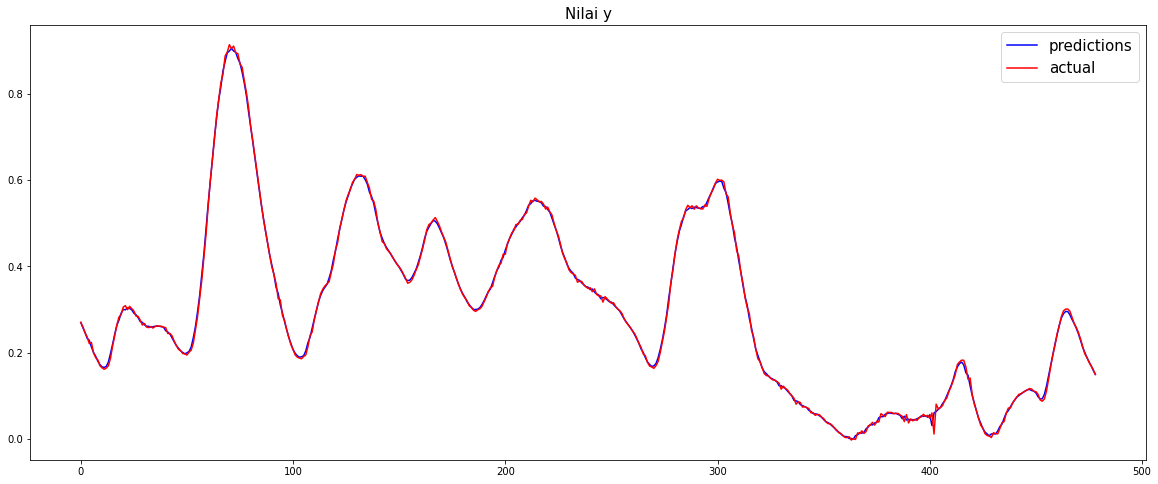

In [7]:
plt.figure(figsize=(20,8))
pyplot.plot(d_t, color='blue', label ="predictions")
pyplot.plot(d_p, color='red',  label = "actual")
plt.legend(fontsize=15)
plt.title('Nilai y', fontsize=15)
pyplot.show()